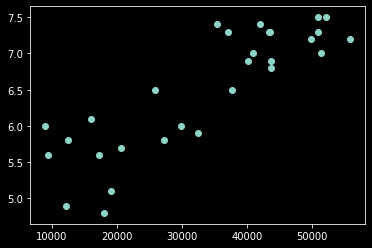

[[5.96242338]]


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


#load
oecd_bli = pd.read_csv("./Datasets/lifesat/oecd_bli_2015.csv", thousands= ",")
gdp_per_capita = pd.read_csv("./Datasets/lifesat/gdp_per_capita.csv", thousands= ",", delimiter = "\t", encoding='latin1', na_values="n/a")



#prep
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
Y = np.c_[country_stats["Life satisfaction"]]

# visualize
plt.scatter(X,Y)
plt.show()

# Linear model
model = sklearn.linear_model.LinearRegression()

# Training
model.fit(X,Y)

# Prediction with trained model
X_new = [[22587]]
print(model.predict(X_new))


